In [269]:
import pandas as pd
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statistics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Spajanje vise skupova podataka
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")



In [270]:
#prikaz podataka
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [271]:
#Tipovi podataka
data.dtypes
#ocigledno ce biti potrebna konverzija nekih podataka

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [272]:
#informacije o podacima
data.info()
#imamo informaciju o tome da nema null podataka

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [273]:
#opis podataka
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [274]:
#opis objekata
data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


In [275]:
# pocetak i kraj zapisa podataka
print("Start :" +data['date_time'].max())
print("End :" +data['date_time'].min())

Start :2018-09-30 23:00:00
End :2012-10-02 09:00:00


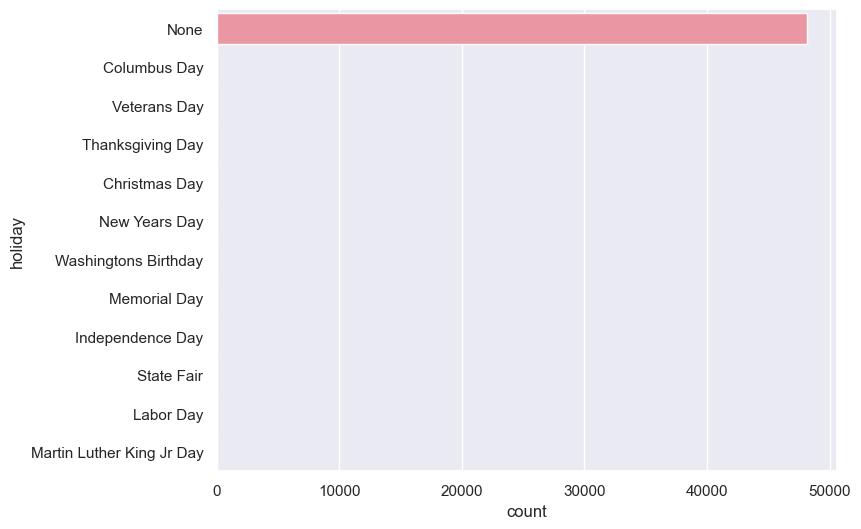

In [276]:
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = data)
plt.show()

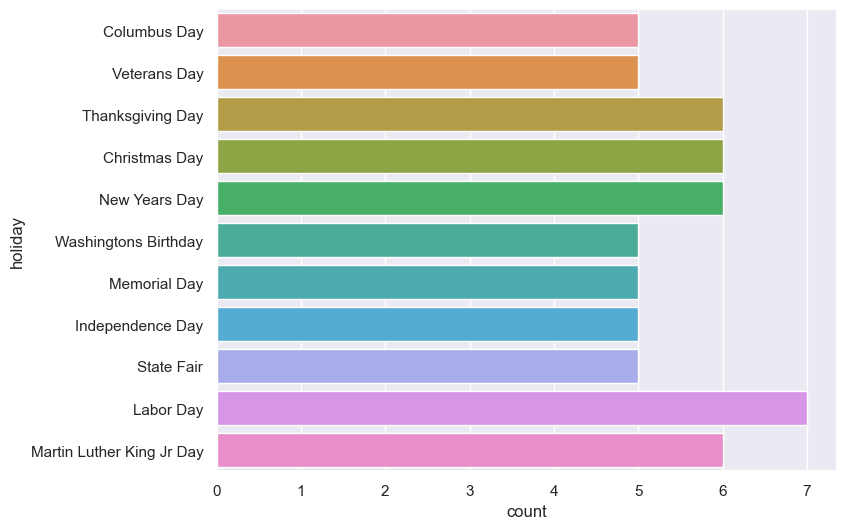

In [277]:
#'None' predstavlja problem, jer ga ima mnogo vise od ostalih dana
holidays = data.loc[data['holiday'] != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()
#ovaj prikaz je znatno bolji i daje prikaz o praznicima, obzirom na to da su praznici svake godine na isti dan, jasno je da je broj slican

c:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


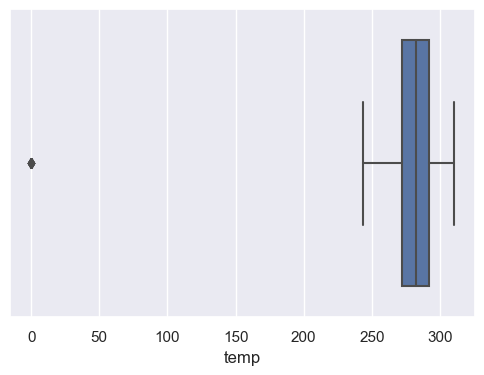

In [278]:
#prikaz podataka o temperaturi
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = data)
plt.show()
#iz prikaza je jasno da postoji oversempling koji oze da utice na mean vrednost

c:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


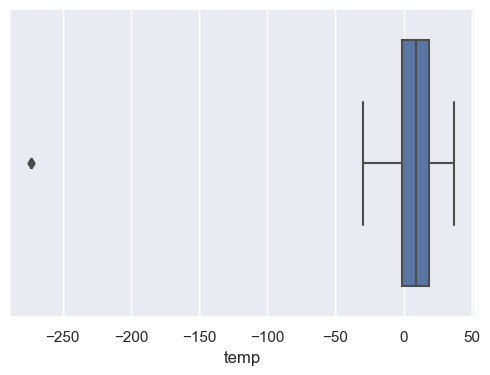

In [279]:
# prebacivanje temperature iz kelvina u celzius zato sto je celzius laksi za razumevanje, bar nama
data['temp'] = (data['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = data)
plt.show()

<Figure size 600x400 with 0 Axes>

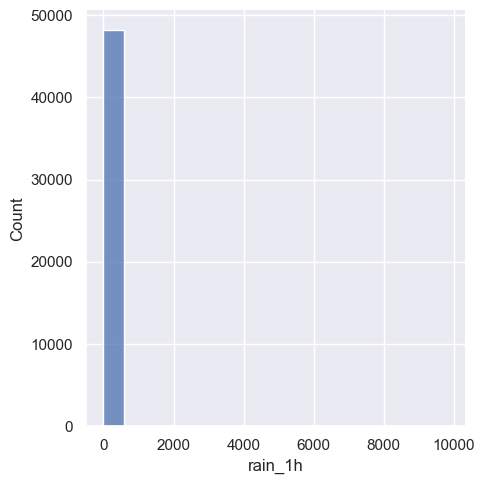

In [280]:
#prikaz podataka o kisi
plt.figure(figsize=(6,4))
sns.displot(data.rain_1h)
plt.show()
# iz prikazanog se vidi da su podaci sto se tice kise delom nekonzistentni, a i u atribut weather_main govori kada je kisa


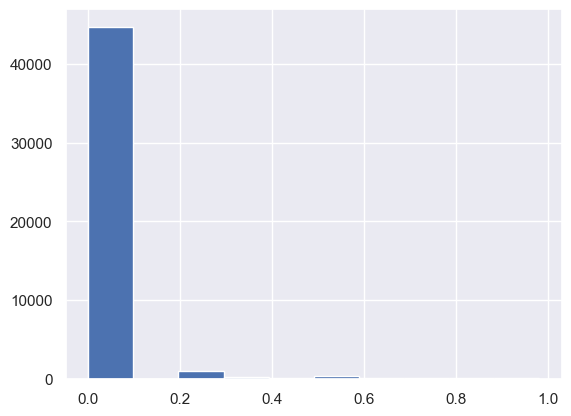

In [281]:
#histogram koji govori o padavimana i koliko u proseku padavina ima oko koje vrednosti
plt.hist(data.rain_1h.loc[data.rain_1h<1])
plt.show()
#jasan prikaz da uglavnom nema kise

<Figure size 600x400 with 0 Axes>

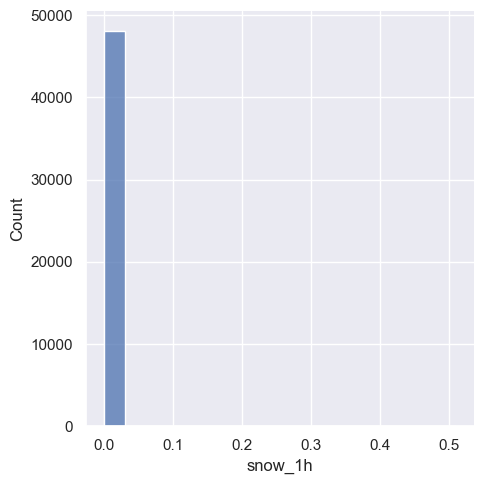

In [282]:
plt.figure(figsize=(6,4))
sns.displot(data.snow_1h)
plt.show()

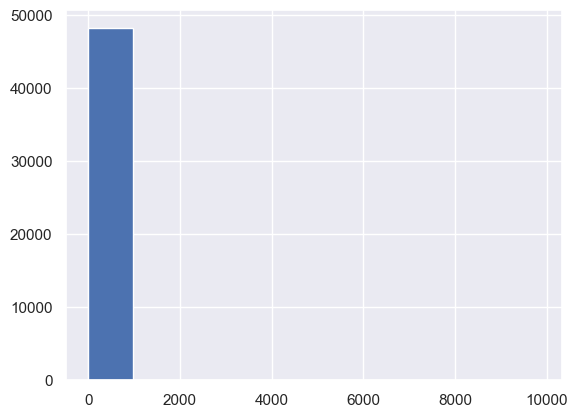

In [283]:
plt.hist(data.rain_1h.loc[data.snow_1h<1])
plt.show()

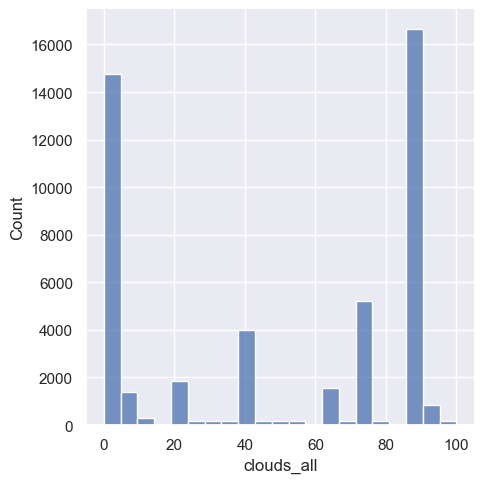

count    48204.000000
mean        49.362231
std         39.015750
min          0.000000
25%          1.000000
50%         64.000000
75%         90.000000
max        100.000000
Name: clouds_all, dtype: float64

In [284]:
#oblacnost 
sns.displot(data.clouds_all)
plt.show()
data['clouds_all'].describe()

<AxesSubplot:xlabel='count', ylabel='weather_main'>

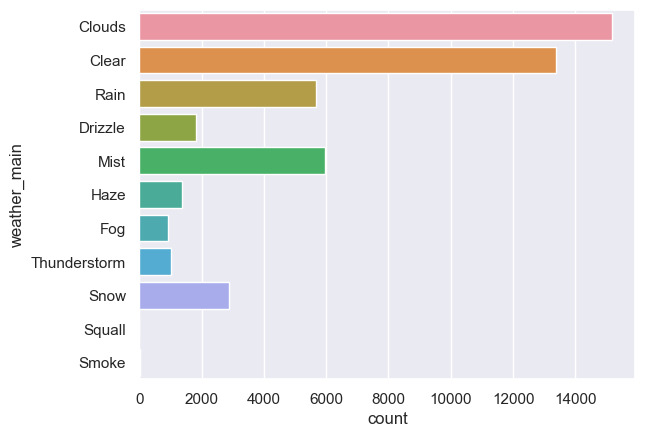

In [285]:
#prikaz podataka o tipovima vremena
sns.countplot(y='weather_main', data=data)

<AxesSubplot:ylabel='Weather Type'>

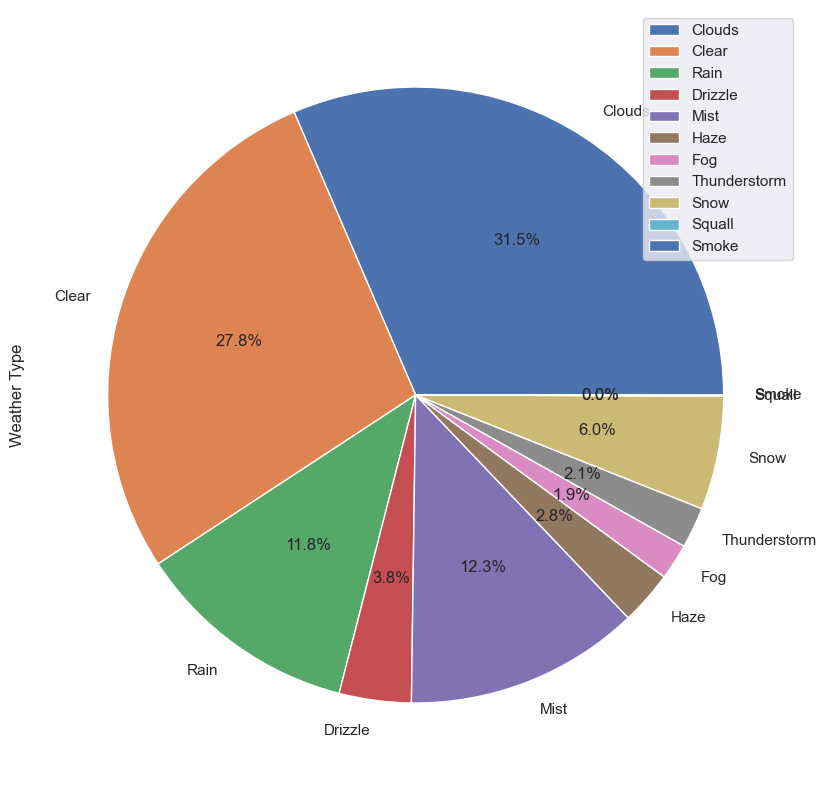

In [286]:

type_counts = data['weather_main'].value_counts()
df2 = pd.DataFrame({'Weather Type': type_counts}, 
                     index = ['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']
                   )
df2.plot.pie(y='Weather Type', figsize=(10,10), autopct='%1.1f%%')

<AxesSubplot:xlabel='traffic_volume', ylabel='Count'>

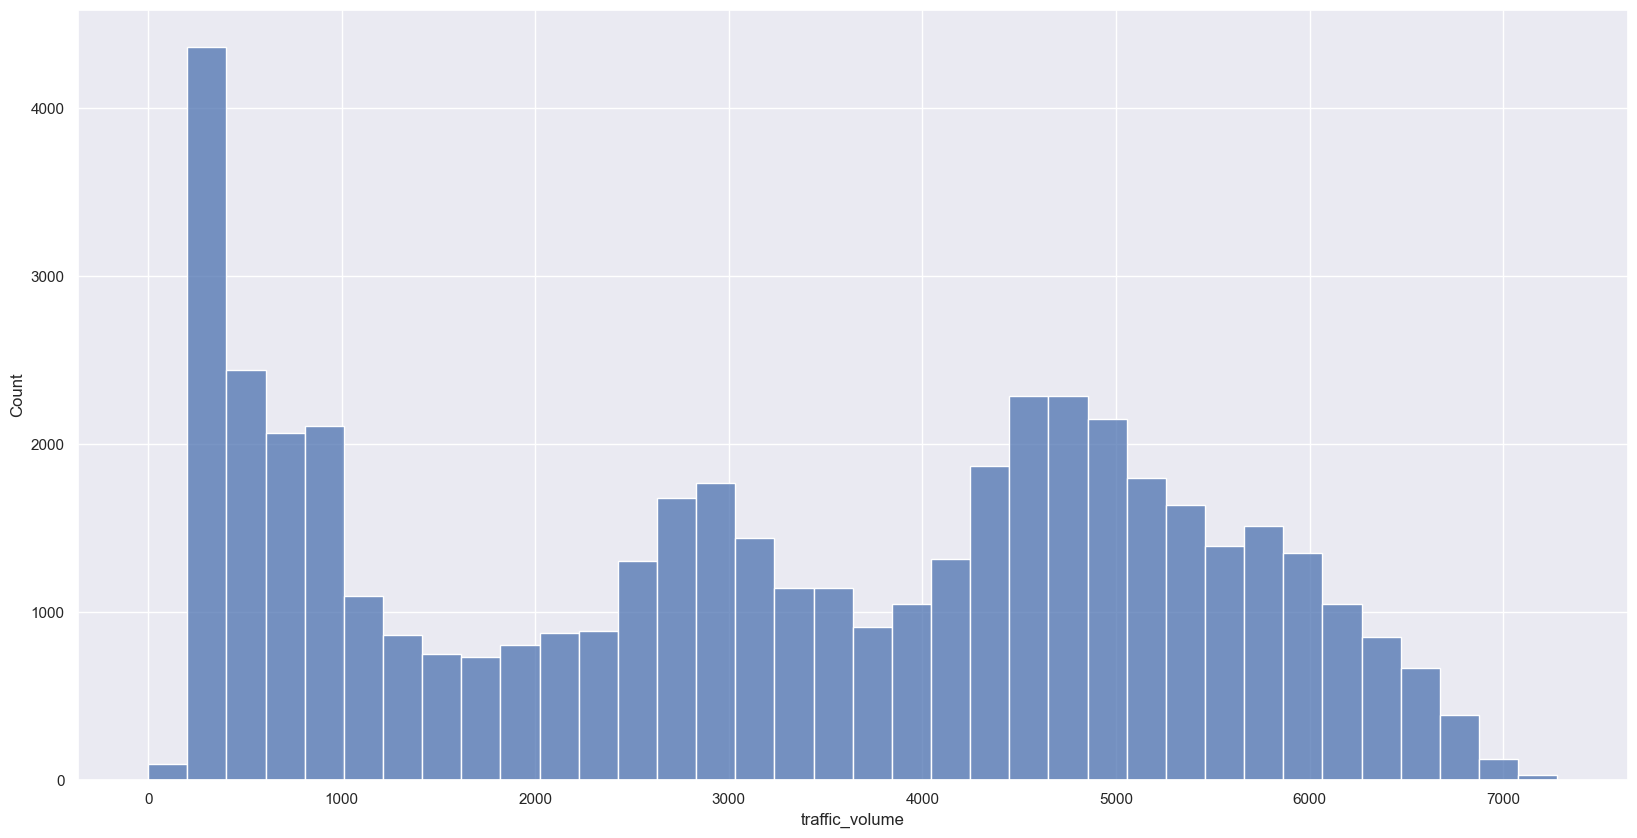

In [287]:
#histogram koji prikazuje vrednosti guzve izmedju vrednosti od minimalne do maksimalne
filter_data = data.dropna(subset=['traffic_volume'])
plt.figure(figsize=(20,10))
sns.histplot(filter_data['traffic_volume'], kde=False)
#sa histograma se vidi da je najvise vrednosti guzve izmedju 200 i 400

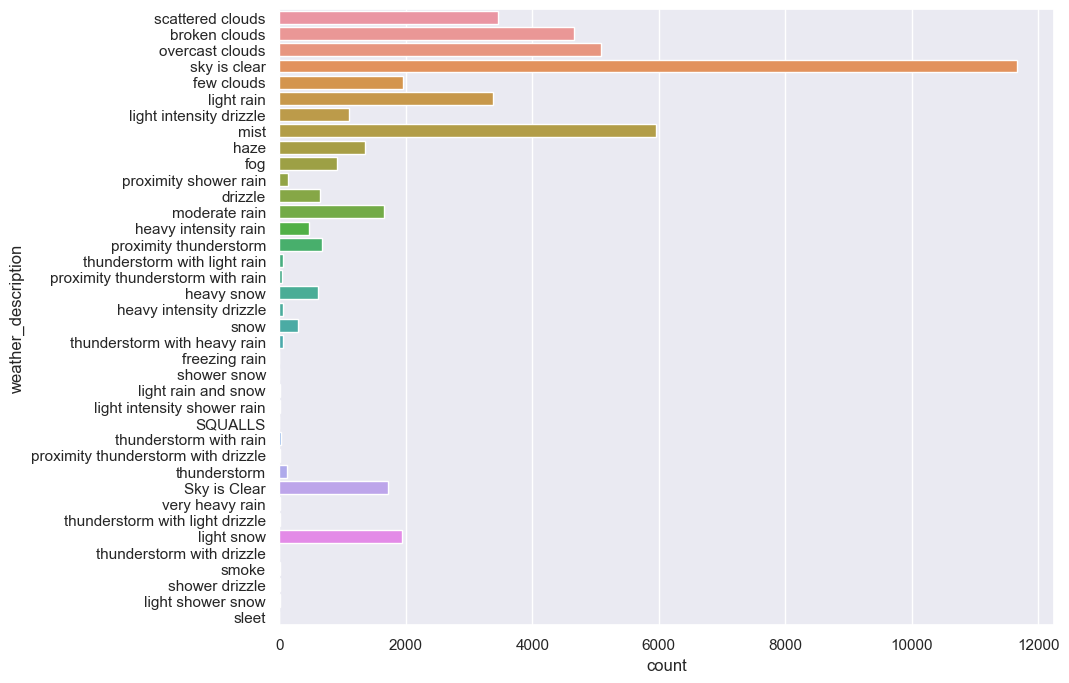

In [288]:
#opisi tipova vremena
plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=data)
plt.show()
#jasno je da je opis tipova vremena feature koji je suvisan, jer vec postoji vremenska prilika

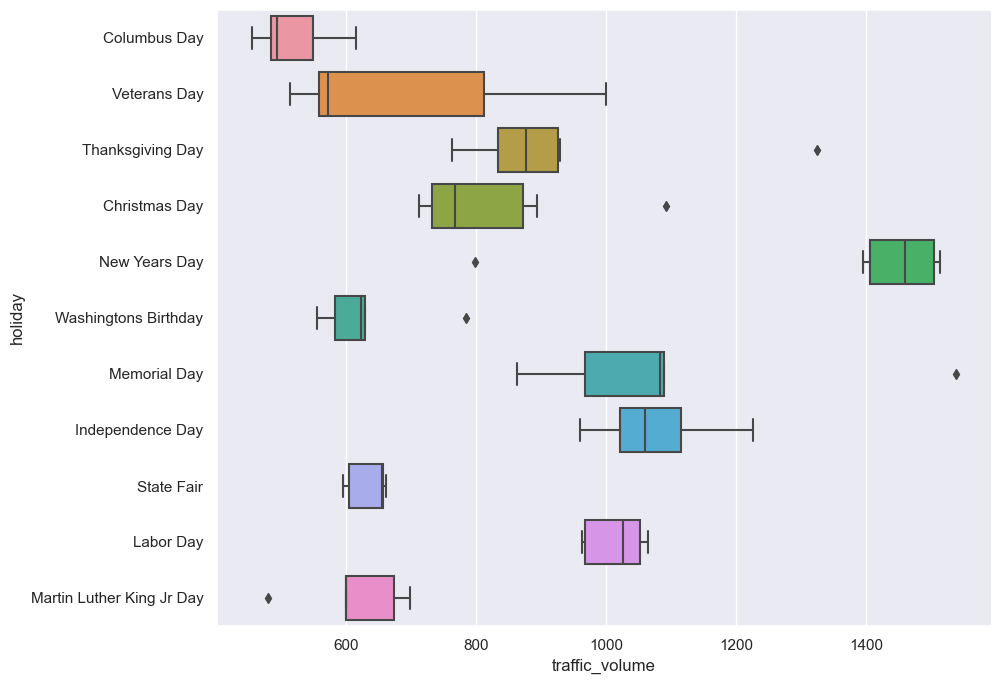

In [289]:
#poredjenje gustine saobracaja za praznike
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

<Figure size 1000x800 with 0 Axes>

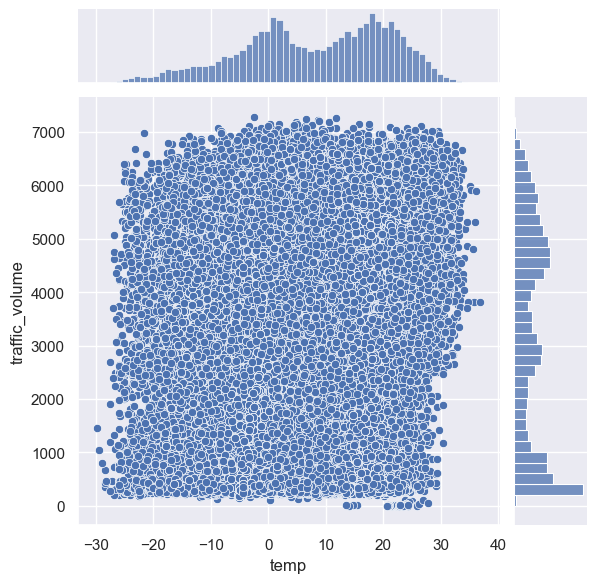

In [290]:
#zavisnost guzve od temperature
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = data.loc[data.temp>-50])
plt.show()

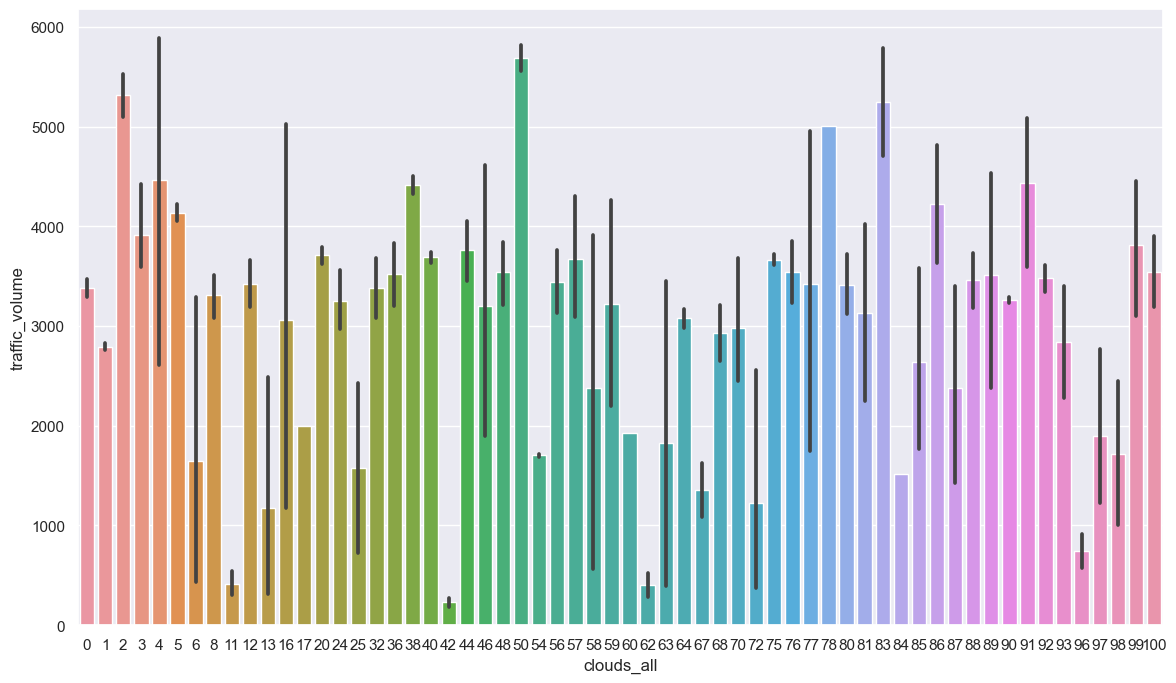

In [291]:
#prikaz zavisnosti guzve od oblacnosti 
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = data)
plt.show()

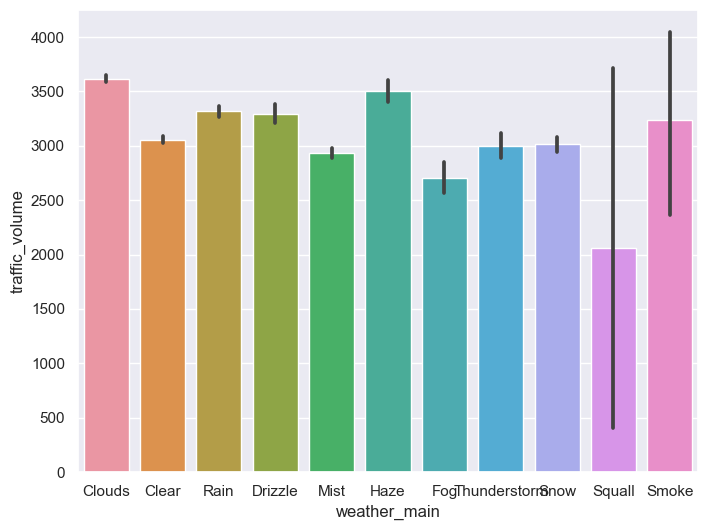

In [292]:
#prikaz zavisnosti guzve od tipa vremena
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = data)
plt.show()

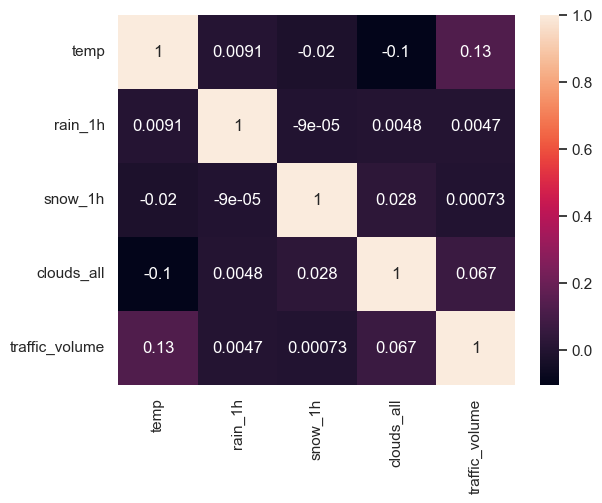

In [293]:
#trazenje jake korelacije izmedju guzve i nekog od feature-a, uz pomoc toplotne mape
sns.heatmap(data.corr(), annot=True)
plt.show()

# Ciscenje podataka



In [294]:
df = data.copy()
df['date_time'] = pd.to_datetime(df.date_time)
df['weekday'] = df.date_time.dt.weekday#dani u nedelji idu od 0 do 6, gde je ponedeljak 0..
df['date'] = df.date_time.dt.date
df['hour'] = df.date_time.dt.hour
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year

df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


In [295]:
#prevodjenje tacnog vremena u objekte, tj kategoricke podatke 
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df['hour'] = df.hour.map(hour_modify)
df.head(6)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012
5,None,18.57,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,1,2012-10-02,Afternoon,10,2012


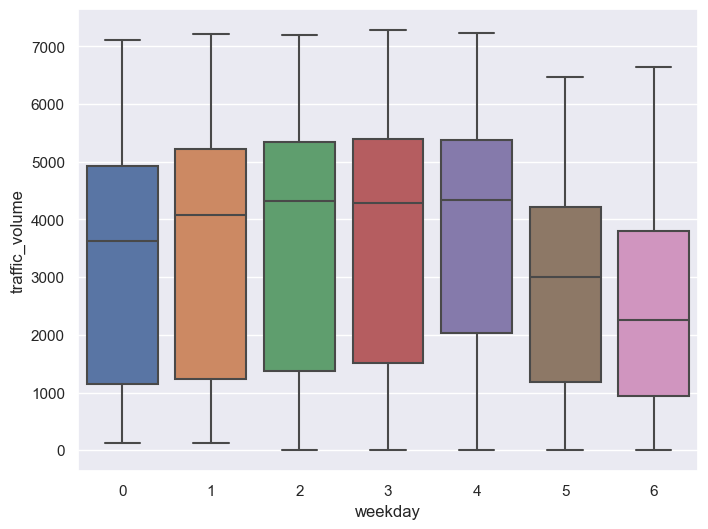

In [296]:
#Guzva za dane u nedelji
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = df)
plt.show()

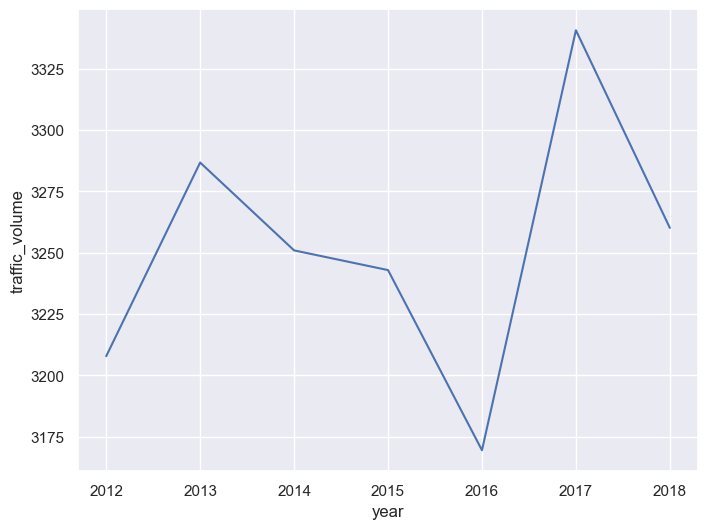

In [297]:
# prikaz guzve na godisnjem nivou
df_date_traffic = df.groupby('year').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic['traffic_volume'], data = df_date_traffic)
plt.show()

In [298]:
#pretvaranje praznika u true ili false, dan ili jeste praznik ili nije
def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
df['holiday'] = df['holiday'].map(modify_holiday)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,False,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,False,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,False,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,False,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,False,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012


c:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


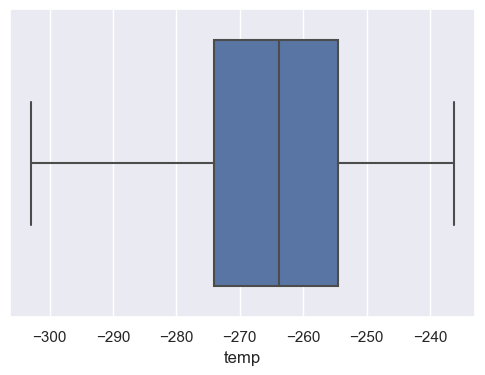

In [299]:
#uklanjanje outliera
df = df.loc[df.temp>-250]
df['temp'] = (df['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df)
plt.show()

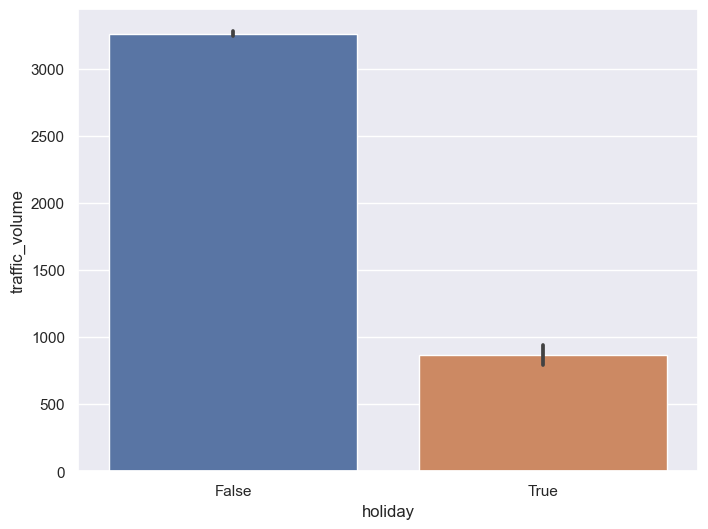

In [300]:
#razlika u guzvi kada je praznik i kada nije
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='traffic_volume', data = df)
plt.show()

In [301]:
#uklanjanje opisa vremena, jer tip vremenskih rilika vec postoji
df.drop(columns = ['weather_description'], inplace = True)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,weekday,date,hour,month,year
0,False,-258.02,0.0,0.0,40,Clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,False,-256.94,0.0,0.0,75,Clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,False,-256.72,0.0,0.0,90,Clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,False,-256.17,0.0,0.0,90,Clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,False,-255.16,0.0,0.0,75,Clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012


In [302]:
#uklanjanje podataka o tome da li je kisa ili sneg jer se vec na osnovu parametra weather zna da li jeste ili nije
df.drop(columns = ['rain_1h','snow_1h'],inplace = True)#note- moze da se prebaci i snow no snow u true i false, takodje i za kisu, ali nekako deluje kao da to vec znamo na osnovu tekucih vremennskih prilika
df.head()

,holiday,temp,clouds_all,weather_main,date_time,traffic_volume,weekday,date,hour,month,year
0,False,-258.02,40,Clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,False,-256.94,75,Clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,False,-256.72,90,Clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,False,-256.17,90,Clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,False,-255.16,75,Clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012


In [303]:
#provera da li ima missing values
data.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [304]:
#brisanje duplikata
data.duplicated(subset=None, keep='first')
#data.drop_duplicates(subset=None, keep='first')

data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [305]:
scaler = MinMaxScaler()

    #Scaling cloud data
data[['clouds_all']] = scaler.fit_transform(data[['clouds_all']])
    #Scaling of temperature data
data[['temp']]=scaler.fit_transform(data[['temp']])

In [306]:
#DESCRIPTIVE ANALYTICS

    #1 Mean of rain in millimeters per one hour 

averageRain = data['rain_1h'].mean()
print("Average rain per 1h: " + str(averageRain)) 

    #2 Mean of traffic volume 
averageTrafficVolume = data['traffic_volume'].mean()
print("Average traffic volume: " + str(averageTrafficVolume)) 

    #3 Median of falling snow in 1h
medianSnow = data['snow_1h'].median()
print("Median snow on 1h: ", medianSnow)

    #4 Median of traffic volume
medianTrafficVolume = data['traffic_volume'].median()
print("Median traffic volume: " + str(medianTrafficVolume)) 

    #5 Standard deviation of traffic volume
standard_deviation = data['traffic_volume'].std()
print("Standard deviation of traffic volume: ", standard_deviation)

    #6 Standard deviation of temperature
standard_deviation = data['temp'].std()
print("Standard deviation of temp: ", standard_deviation)

#data.head(3000)
#data[['clouds_all']]

    #Converting temperature from Kelvin to Celsius
#data['Temperature'] = data['temp'].subtract(273.16)


    #Output sMinimum and Maximum Temperature
minTemp = data['temp'].min()
maxTemp = data['temp'].max()
print("Minimum temperature: ", minTemp, "Maximum temperature: ", maxTemp)

    #range of data - difference between inimum and maximum
rangee=np.ptp(data['traffic_volume'])
print("range guzve je:", rangee)

rangee=np.ptp(data['temp'])
print("range temperature je:", rangee)



    #Mode
mode = data['traffic_volume'].mode()
print("Mode of traffic volume: ", mode)

variance = statistics.variance(data['traffic_volume'])
print("Variance of traffic volume: ", variance)

Average rain per 1h: 0.33426396149697535
Average traffic volume: 3259.8183553232097
Median snow on 1h:  0.0
Median traffic volume: 3380.0
Standard deviation of traffic volume:  1986.8606704463552
Standard deviation of temp:  0.043016841076777335
Minimum temperature:  0.0 Maximum temperature:  0.9999999999999999
range guzve je: 7280
range temperature je: 0.9999999999999999
Mode of traffic volume:  0    353
1    356
Name: traffic_volume, dtype: int64
Variance of traffic volume:  3947615.3237665542


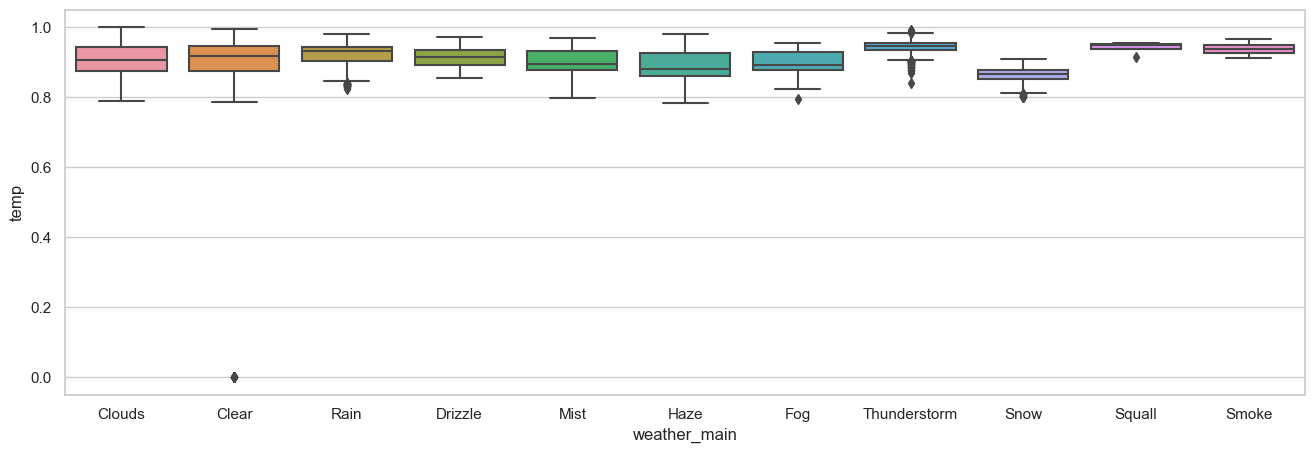

In [307]:
%matplotlib inline
sns.set(style="whitegrid")
plt.figure(figsize=(16,5))
ax = sns.boxplot( x="weather_main", y="temp", data=data, orient="v")

<AxesSubplot:ylabel='weather_description'>

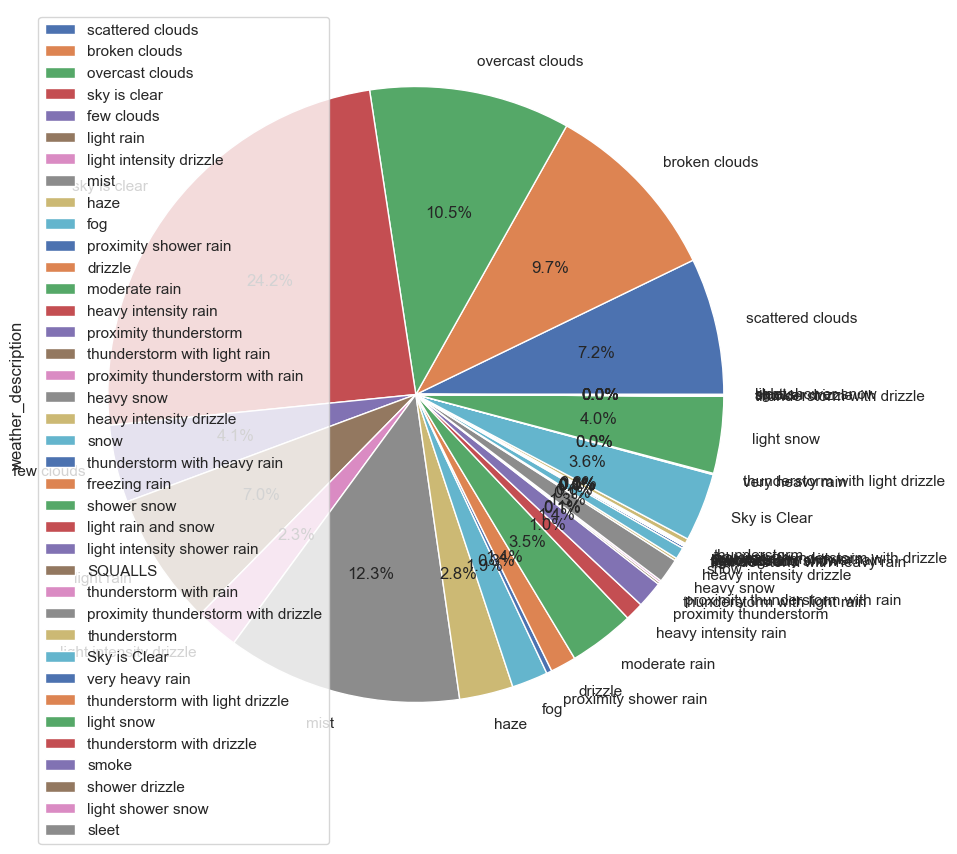

In [308]:
type_counts = data['weather_description'].value_counts()
df2 = pd.DataFrame({'weather_description': type_counts}, 
                     index = ['scattered clouds', 'broken clouds', 'overcast clouds', 'sky is clear',
    'few clouds', 'light rain', 'light intensity drizzle', 'mist', 'haze', 'fog',
    'proximity shower rain', 'drizzle', 'moderate rain', 'heavy intensity rain',
    'proximity thunderstorm', 'thunderstorm with light rain',
    'proximity thunderstorm with rain', 'heavy snow', 'heavy intensity drizzle',
    'snow', 'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
    'light rain and snow', 'light intensity shower rain', 'SQUALLS',
    'thunderstorm with rain', 'proximity thunderstorm with drizzle',
    'thunderstorm', 'Sky is Clear', 'very heavy rain',
    'thunderstorm with light drizzle', 'light snow',
    'thunderstorm with drizzle', 'smoke', 'shower drizzle', 'light shower snow',
    'sleet'])
df2.plot.pie(y='weather_description', figsize=(10,10), autopct='%1.1f%%')

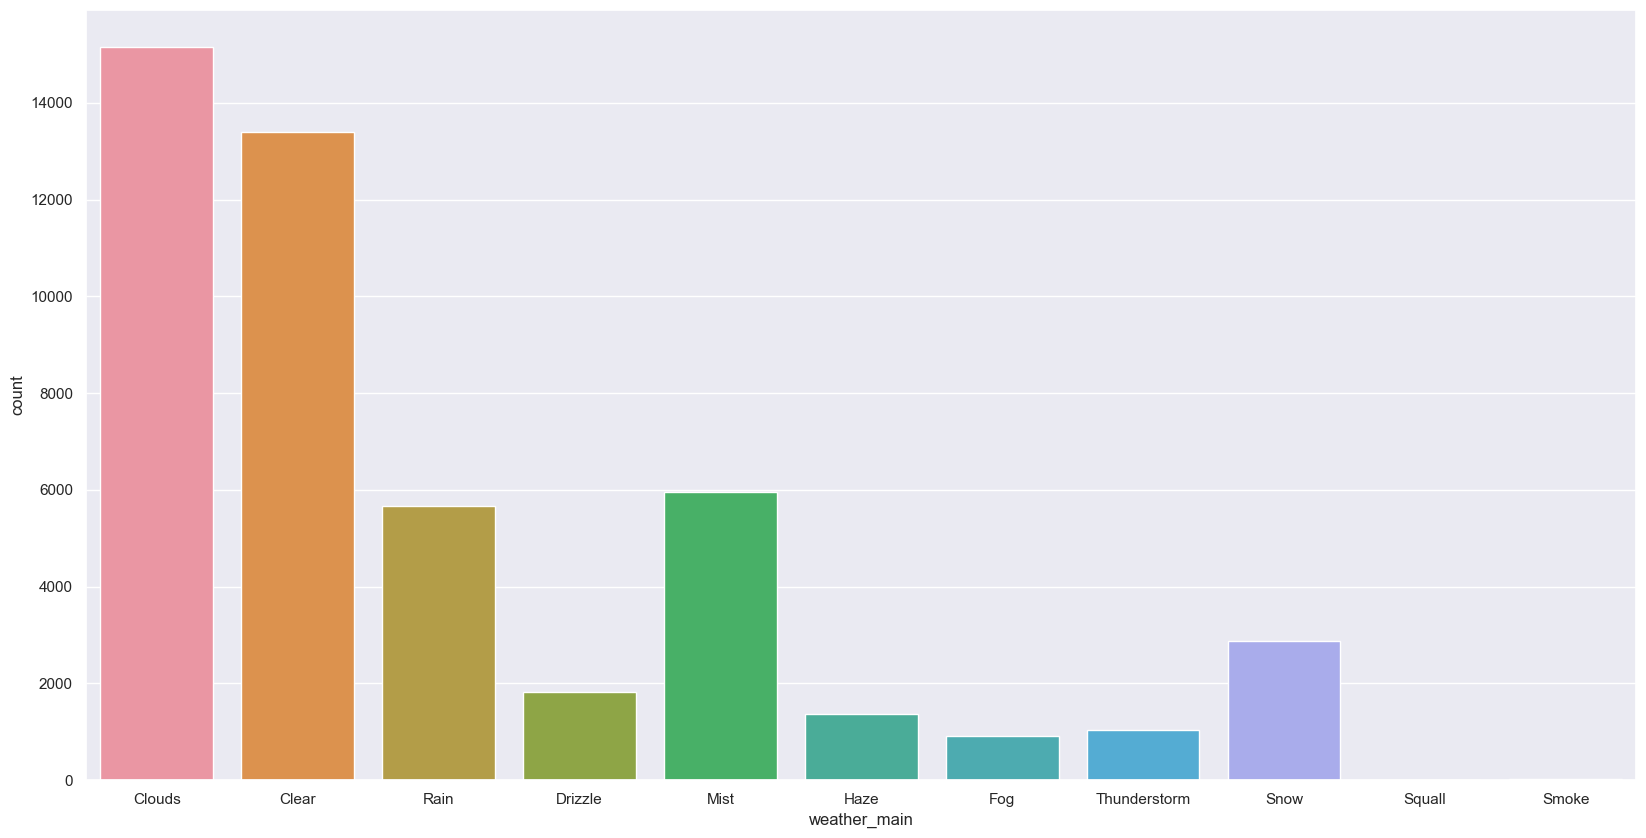

In [309]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='weather_main', data=data)

In [310]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,0.929726,0.0,0.0,0.40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,0.933209,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,0.933918,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,0.935692,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,0.938949,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [311]:
from sklearn.preprocessing import OneHotEncoder


# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[['weather_main']]))

# One-hot encoding removed index; put it back
OH_cols.index = data.index
column_name = OH_encoder.get_feature_names_out(['weather_main'])
OH_cols.columns = column_name
# Remove categorical columns (will replace with one-hot encoding)
num_X = data.drop("weather_main", axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)

#one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

OH_X.head()
data = OH_X

In [312]:
y = data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

AttributeError: 'DataFrame' object has no attribute 'Price'

In [ ]:
array = data.values
#print(array)
print(array.shape)
X = array[:,0:array.shape[0] / 4]
y = array[:,4]

print(X.size)
print(y.size)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# # Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# # Compare Algorithms
# plt.boxplot(results, labels=names)
# plt.title('Algorithm Comparison')
# plt.show()

(48204, 19)
48204
48204
LR: nan (nan)
CART: nan (nan)


c:\Users\Legion\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Legion\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Legion\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "c:\Users\Legion\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Legion\anaconda